# Notebook Summary

This notebook has 4 models/experiments to see what works to get better results

* 1% data feature extraction model with data augmentation
* 10% data feature extraction model with data augmentation
* 10% data fine tuning model with data augmentation
* 100% data fine tuning model with data augmentation

### Model-1/Experiment-1

##### 1% data feature extraction model with data augmentation

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/Food Datasets/10_food_classes_1_percent.zip"

Archive:  /content/drive/MyDrive/Datasets/Food Datasets/10_food_classes_1_percent.zip
   creating: 10_food_classes_1_percent/
  inflating: __MACOSX/._10_food_classes_1_percent  
   creating: 10_food_classes_1_percent/test/
  inflating: __MACOSX/10_food_classes_1_percent/._test  
   creating: 10_food_classes_1_percent/train/
  inflating: __MACOSX/10_food_classes_1_percent/._train  
   creating: 10_food_classes_1_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_1_percent/test/._ice_cream  
   creating: 10_food_classes_1_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_1_percent/test/._chicken_curry  
   creating: 10_food_classes_1_percent/test/steak/
  inflating: __MACOSX/10_food_classes_1_percent/test/._steak  
   creating: 10_food_classes_1_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_1_percent/test/._sushi  
   creating: 10_food_classes_1_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_1_percent/test/._chicken_wings  
   cre

In [ ]:
train_dir = "/content/10_food_classes_1_percent/train"

test_dir = "/content/10_food_classes_1_percent/test"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_data = image_dataset_from_directory(directory = train_dir,
                                          label_mode = "categorical",
                                          batch_size = 32,
                                          image_size = (224,224))

test_data = image_dataset_from_directory(directory = test_dir,
                                        label_mode = "categorical",
                                        batch_size = 32,
                                        image_size = (224,224))

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

In [ ]:
data_augmentation = tf.keras.Sequential([
                                      preprocessing.RandomFlip("horizontal"),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2)
],name = "data_augmentation")
# We can also rescale if needed using preprocessing but efficientnet does not needed rescaling.

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name = "Input_Layer" )

x = data_augmentation(inputs)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D(name = "Global_Pooling_2D")(x)

output = tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer")(x)

model1 = tf.keras.Model(inputs,output)


In [ ]:
model1.compile(loss = "categorical_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

In [ ]:
history1 = model1.fit(train_data,
                      epochs = 5,
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
3/3 [==============================] - 45s 5s/step - loss: 2.4779 - accuracy: 0.0857 - val_loss: 2.2179 - val_accuracy: 0.1872
Epoch 2/5
3/3 [==============================] - 9s 4s/step - loss: 2.1960 - accuracy: 0.1857 - val_loss: 2.0914 - val_accuracy: 0.2704
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 2.0212 - accuracy: 0.3429 - val_loss: 1.9883 - val_accuracy: 0.3464
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.8266 - accuracy: 0.5286 - val_loss: 1.8986 - val_accuracy: 0.4220
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.6776 - accuracy: 0.6714 - val_loss: 1.8187 - val_accuracy: 0.4748


In [ ]:
# Around 47% accuracy on test_data with just 1% images

### Model-2/Experiment-2

##### 10% data with data augmentation

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/Food Datasets/10_food_classes_10_percent.zip"

Archive:  /content/drive/MyDrive/Datasets/Food Datasets/10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chick

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train"

test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
train_data = image_dataset_from_directory(directory = train_dir,
                                          label_mode = "categorical",
                                          batch_size = 32,
                                          image_size = (224,224))

test_data = image_dataset_from_directory(directory = test_dir,
                                         label_mode = "categorical",
                                         batch_size = 32,
                                         image_size = (224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
data_augmentation = tf.keras.Sequential([
                                  preprocessing.RandomFlip("horizontal"),
                                  preprocessing.RandomRotation(0.2),
                                  preprocessing.RandomZoom(0.2),
                                  preprocessing.RandomHeight(0.2),
                                  preprocessing.RandomWidth(0.2)
],name = "data_augmentation_layer")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name = "input_layer" )

x = data_augmentation(inputs)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D(name = "GlobalAveragePooling2D")(x)

outputs = tf.keras.layers.Dense(10,activation="softmax",name = "output_layer" )(x)

model2 = tf.keras.Model(inputs,outputs)

In [ ]:
model2.compile(loss = "categorical_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

In [ ]:
# Checkpoint Callback

checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [ ]:
history2 = model2.fit(train_data,
                      epochs = 5,
                      validation_data = test_data,
                      validation_steps = len(test_data),
                      callbacks = [checkpoint_callback])

Epoch 1/5
24/24 [==============================] - 24s 785ms/step - loss: 2.0360 - accuracy: 0.3253 - val_loss: 1.5358 - val_accuracy: 0.6212

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 16s 669ms/step - loss: 1.4131 - accuracy: 0.6507 - val_loss: 1.1003 - val_accuracy: 0.7368

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 16s 670ms/step - loss: 1.1166 - accuracy: 0.7320 - val_loss: 0.8853 - val_accuracy: 0.7780

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 15s 631ms/step - loss: 0.9505 - accuracy: 0.7400 - val_loss: 0.7781 - val_accuracy: 0.8004

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 14s 604ms/step - loss: 0.8392 - accuracy: 0.7

In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.7082 - accuracy: 0.8112


[0.7082303166389465, 0.8112000226974487]

In [ ]:
# We get around 81% accuracy on our test_data

In [ ]:
model2.load_weights(checkpoint_path)

model2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.7082 - accuracy: 0.8112


[0.7082304358482361, 0.8112000226974487]

In [ ]:
# We see that we get same results after loading the saved weights


### Model-3/Experiment-3

##### 10% data,data augmentation,fine tuning

In [ ]:
# Unfreezing the last 10 layers.

base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for layer in base_model.layers :
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
# While fine tuning we usually reduce the lr by a factor of 10
model2.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics= ["accuracy"])

In [ ]:
initial_epochs = 5 # Use this in previous model and use the below technique to continue from this epoch when fine tuning

fine_tuning_epochs = initial_epochs + 5

history3 = model2.fit(train_data,
                      epochs = fine_tuning_epochs,
                      validation_data = test_data,
                      validation_steps = len(test_data),
                      initial_epoch = history2.epoch[-1]
                      )

Epoch 5/10
24/24 [==============================] - 22s 704ms/step - loss: 0.8561 - accuracy: 0.7693 - val_loss: 0.6158 - val_accuracy: 0.8264
Epoch 6/10
24/24 [==============================] - 15s 618ms/step - loss: 0.7351 - accuracy: 0.8200 - val_loss: 0.5723 - val_accuracy: 0.8296
Epoch 7/10
24/24 [==============================] - 14s 604ms/step - loss: 0.6444 - accuracy: 0.8333 - val_loss: 0.5424 - val_accuracy: 0.8340
Epoch 8/10
24/24 [==============================] - 14s 595ms/step - loss: 0.5869 - accuracy: 0.8547 - val_loss: 0.5209 - val_accuracy: 0.8356
Epoch 9/10
24/24 [==============================] - 14s 588ms/step - loss: 0.5527 - accuracy: 0.8587 - val_loss: 0.5085 - val_accuracy: 0.8400
Epoch 10/10
24/24 [==============================] - 15s 611ms/step - loss: 0.5102 - accuracy: 0.8720 - val_loss: 0.5004 - val_accuracy: 0.8416


In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.5004 - accuracy: 0.8416


[0.5003764033317566, 0.8416000008583069]

In [ ]:
# We get an accuracy of around 84% on the test data

# Model-4/Experiment-4

##### 100% data,data_augmentation,fine tuning

In [ ]:
# Reverting model2 to its initial state so that we can reuse it in this fine tuning experiment

model2.load_weights(checkpoint_path)

model2.evaluate(test_data)

79/79 [==============================] - 9s 103ms/step - loss: 0.7082 - accuracy: 0.8112


[0.7082302570343018, 0.8112000226974487]

In [ ]:
# We see that model 2 is back at its inital state of around 81% accuracy

In [ ]:
# Loading 100% data

!unzip "/content/drive/MyDrive/Datasets/Food Datasets/10_food_classes_all_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: 10_food_classes_all_data/train/hamburger/2119225.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2119225.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/22923.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._22923.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/3894442.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._3894442.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/1101890.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._1101890.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2715888.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2715888.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/554363.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._554363.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2100953.jpg  
  inf

In [ ]:
train_dir = "/content/10_food_classes_all_data/train"

test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
train_data = image_dataset_from_directory(directory = train_dir,
                                         label_mode = "categorical",
                                         batch_size = 32,
                                         image_size = (224,224))

test_data = image_dataset_from_directory(directory = test_dir,
                                         label_mode = "categorical",
                                         batch_size = 32,
                                         image_size= (224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for layer in base_model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
# The base model is still the same

model2.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

In [ ]:
fine_tuning_epochs = initial_epochs + 5

history4 = model2.fit(train_data,
                      epochs=fine_tuning_epochs,
                      validation_data = test_data,
                      validation_steps = len(test_data),
                      initial_epoch = history2.epoch[-1])

Epoch 5/10
235/235 [==============================] - 54s 205ms/step - loss: 0.8449 - accuracy: 0.7427 - val_loss: 0.4256 - val_accuracy: 0.8636
Epoch 6/10
235/235 [==============================] - 63s 268ms/step - loss: 0.6573 - accuracy: 0.7969 - val_loss: 0.3718 - val_accuracy: 0.8816
Epoch 7/10
235/235 [==============================] - 62s 262ms/step - loss: 0.5897 - accuracy: 0.8124 - val_loss: 0.3507 - val_accuracy: 0.8880
Epoch 8/10
235/235 [==============================] - 56s 236ms/step - loss: 0.5346 - accuracy: 0.8268 - val_loss: 0.3213 - val_accuracy: 0.8960
Epoch 9/10
235/235 [==============================] - 53s 226ms/step - loss: 0.5018 - accuracy: 0.8393 - val_loss: 0.3135 - val_accuracy: 0.8992
Epoch 10/10
235/235 [==============================] - 53s 223ms/step - loss: 0.4676 - accuracy: 0.8541 - val_loss: 0.3029 - val_accuracy: 0.9020


In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.3029 - accuracy: 0.9020


[0.3028999865055084, 0.9020000100135803]

In [ ]:
# We get an accuracy of around 90%

In [ ]:
# ONLY SCALE IF NEEDED. EFFICIENTNET DOES NOT NEED SCALING AS IT SCALES ON ITS OWN AND THUS SCALING TWICE WILL GIVE INCORRECT RESULTS

def load_image(file_path):

  img = tf.io.read_file(file_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size = [224,224])

  # img = img/255.

  return img


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def predict_and_plot(model,file_path):

  img = load_image(file_path)

  pred = model.predict(tf.expand_dims(img,axis = 0))

  prediction = class_names[pred[0].argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.axis("off")
  plt.title(prediction)

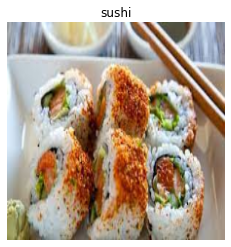

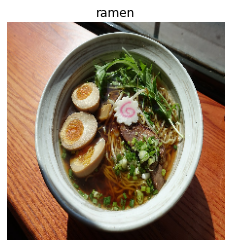

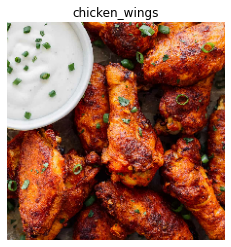

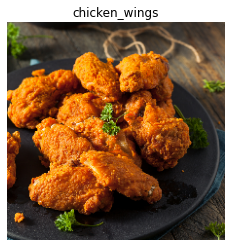

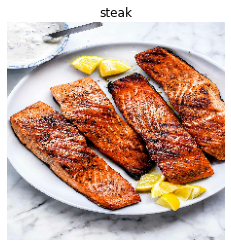

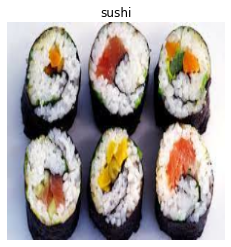

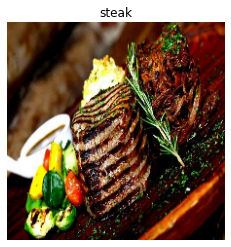

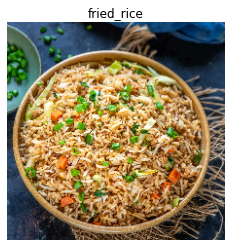

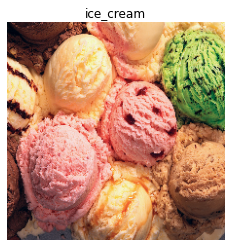

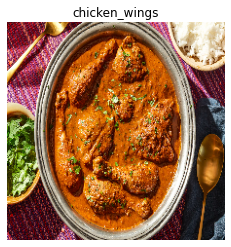

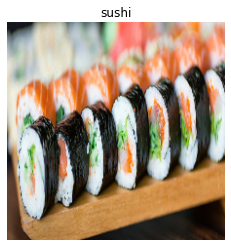

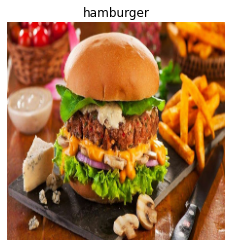

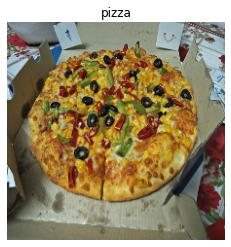

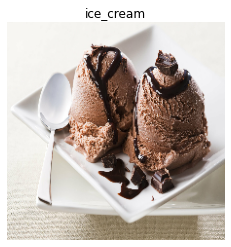

In [ ]:
# Trying on custom images
import os
custom_images_path = "/content/drive/MyDrive/Datasets/Food Datasets/Custom_Images"

for image in os.listdir(custom_images_path):
  image_path = custom_images_path+"/"+image
  predict_and_plot(model2,image_path)